In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vegetable-image-dataset


In [ ]:
train_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
val_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'
test_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/test'

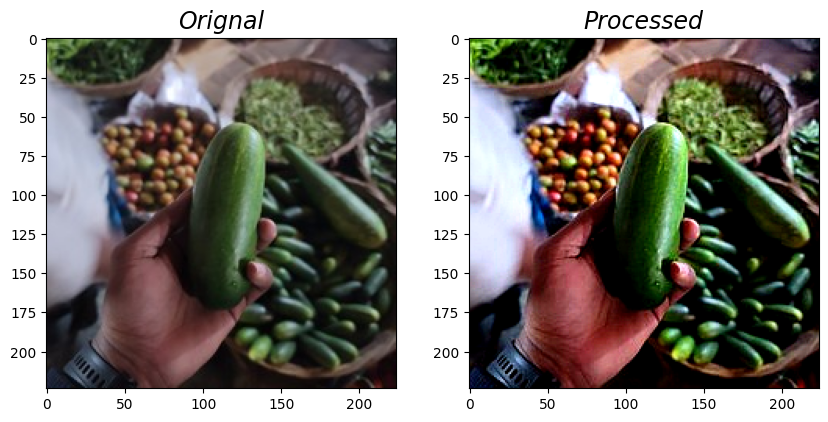

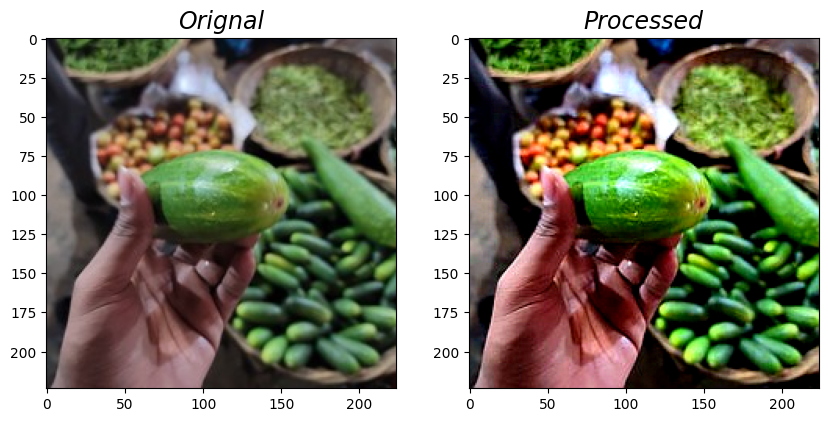

In [ ]:
from PIL import Image
from PIL import ImageEnhance

image_folder="Cucumber"  # The vegetable you want to display
number_of_images=2       # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):

        folder = os.path.join(test_dir,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)

        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1

Preprocess()

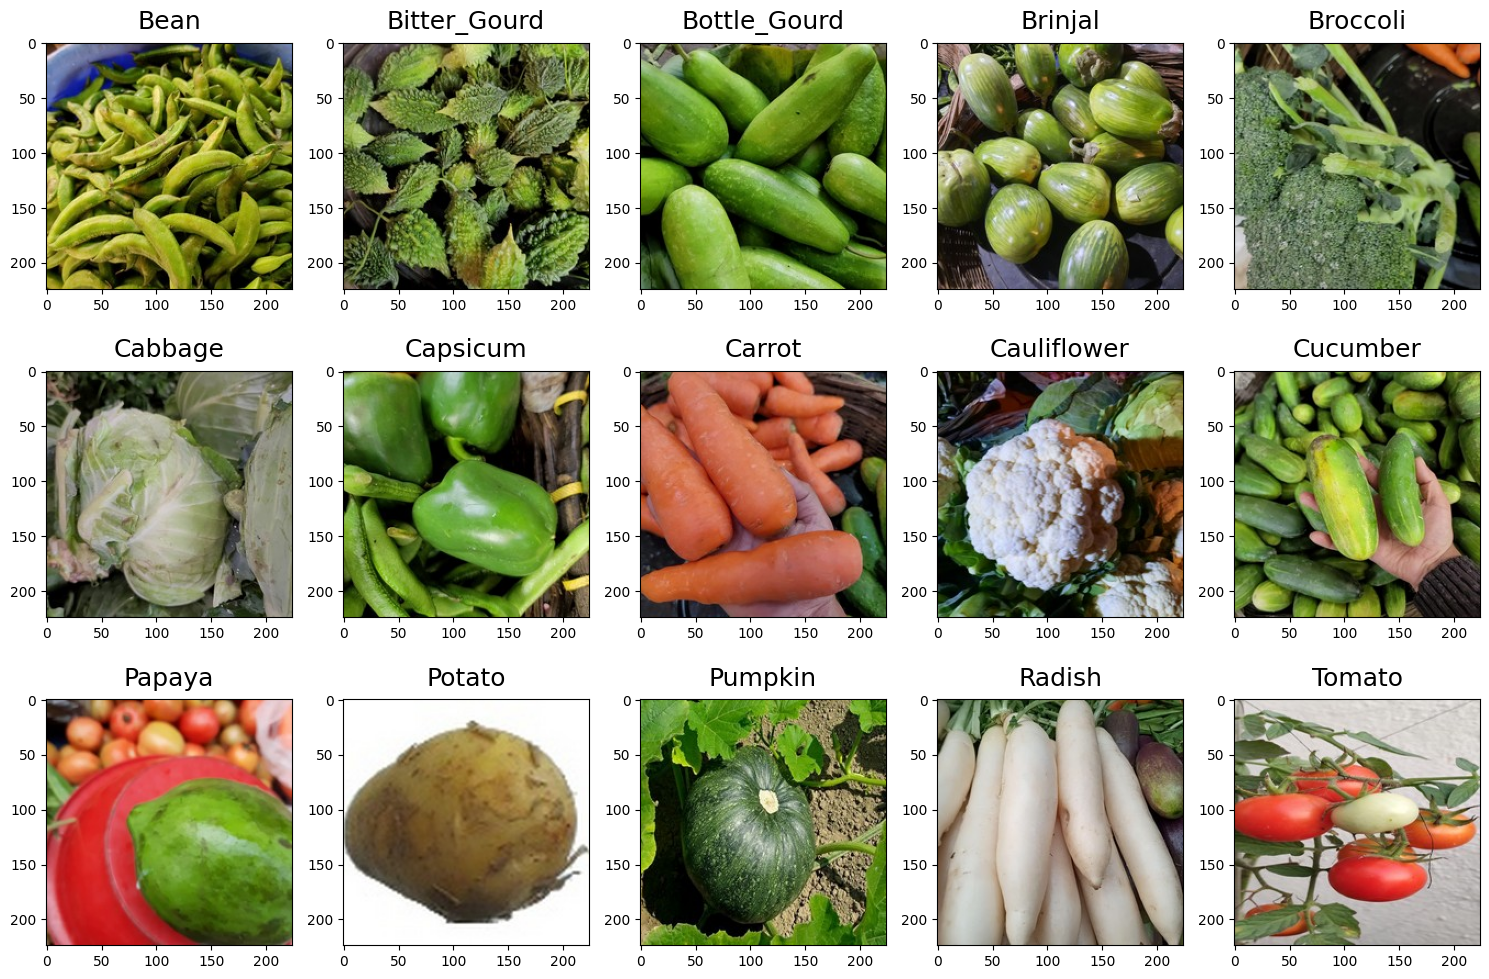

In [ ]:
images = []

for food_folder in sorted(os.listdir(test_dir)):
    food_items = os.listdir(test_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(test_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [ ]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
class_map = training_set.class_indices
class_map

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8327 - loss: 0.5679 - val_accuracy: 0.9870 - val_loss: 0.0517
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 187s 794ms/step - accuracy: 0.9783 - loss: 0.0738 - val_accuracy: 0.9800 - val_loss: 0.0573
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 187s 798ms/step - accuracy: 0.9823 - loss: 0.0535 - val_accuracy: 0.9867 - val_loss: 0.0473
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 186s 793ms/step - accuracy: 0.9864 - loss: 0.0447 - val_accuracy: 0.9943 - val_loss: 0.0234
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 187s 797ms/step - accuracy: 0.9889 - loss: 0.0358 - val_accuracy: 0.9953 - val_loss: 0.0191


In [ ]:
model.save('model_inceptionV3_epoch5.h5')


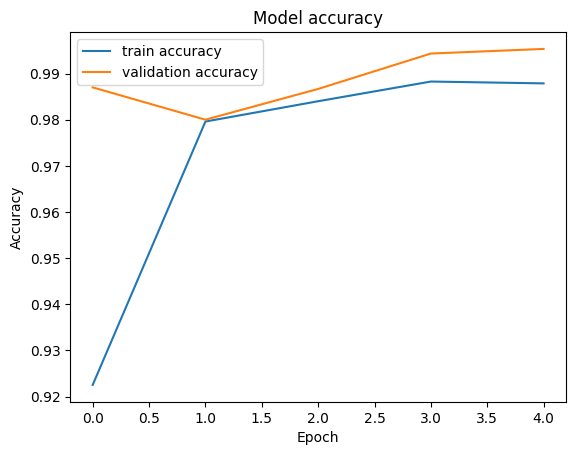

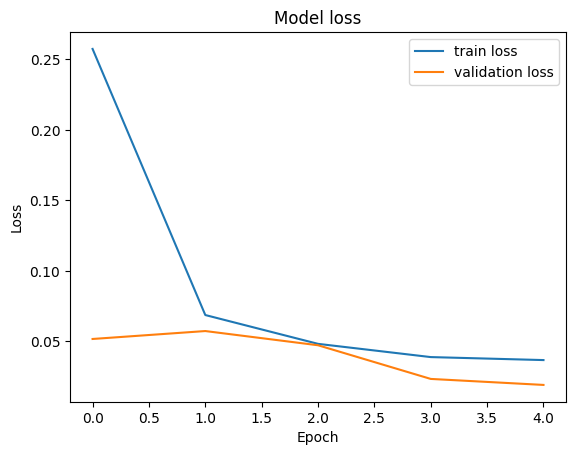

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(r)
plot_loss(r)

In [ ]:
test_loss,test_acc=model.evaluate(test_set)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.9922 - loss: 0.0296


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


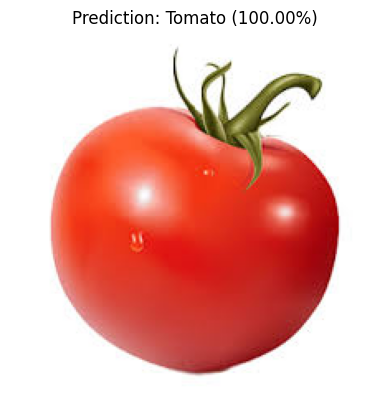

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}
image_path = '/content/images (3).jpg'

img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = tf.cast(img_array, tf.float32) / 255.0

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = category[predicted_class_index]
confidence = predictions[0][predicted_class_index]

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class_name} ({confidence*100:.2f}%)")
plt.show()

In [ ]:
model.save('model_inceptionV3.h5')
